Venn 图已保存为: venn_ctcf_gps2_atf4.png


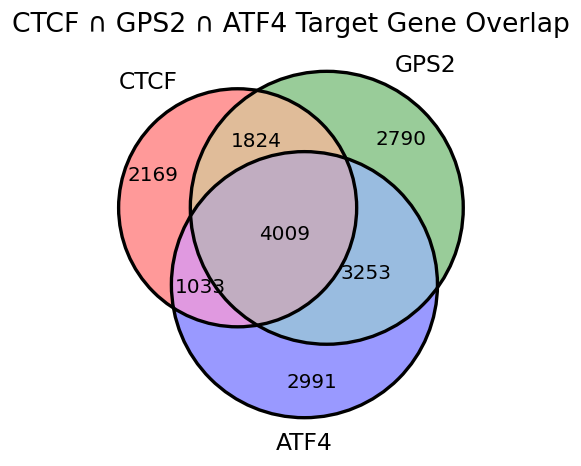

In [17]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
venn_ctcf_gps2_atf4.py

生成 CTCF、GPS2、ATF4 三集合基因重叠的 Venn 图，并保存为 PNG 文件。
"""

import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

def main():
    # --- 数据区 ---
    A   = 9035    # CTCF 全集
    B   = 11876   # GPS2 全集
    C   = 11286   # ATF4 全集
    AB  = 5833    # CTCF ∧ GPS2
    AC  = 5042    # CTCF ∧ ATF4
    BC  = 7262    # GPS2 ∧ ATF4
    ABC = 4009    # CTCF ∧ GPS2 ∧ ATF4

    # 计算“仅属于”各区块的基因数
    onlyA  = A  - AB - AC + ABC
    onlyB  = B  - AB - BC + ABC
    onlyC  = C  - AC - BC + ABC
    onlyAB = AB - ABC
    onlyAC = AC - ABC
    onlyBC = BC - ABC

    subsets = (onlyA, onlyB, onlyAB, onlyC, onlyAC, onlyBC, ABC)
    labels  = ('CTCF', 'GPS2', 'ATF4')

    # --- 绘图区 ---
    fig, ax = plt.subplots(figsize=(5, 4), dpi=120)
    v = venn3(subsets=subsets, set_labels=labels, ax=ax)
    venn3_circles(subsets=subsets, ax=ax, linewidth=2)

    # 调整字体
    for lbl in v.subset_labels:
        if lbl:
            lbl.set_fontsize(12)
    for lbl in v.set_labels:
        lbl.set_fontsize(14)

    ax.set_title('CTCF ∩ GPS2 ∩ ATF4 Target Gene Overlap', fontsize=16)
    ax.set_axis_off()
    plt.tight_layout()

    # 保存并显示
    out_file = "venn_ctcf_gps2_atf4.png"
    plt.savefig(out_file, dpi=300)
    print(f"Venn 图已保存为: {out_file}")
    plt.show()


if __name__ == "__main__":
    main()


In [3]:
# 把下面路径改成你的实际路径
atf4_path = "/projectnb/perissilab/Xinyu/GPS2_CHIPseq/ATF4_3T3L1/results/annotation/ATF4_gene_symbols.txt"
gps2_path = "/projectnb/perissilab/Xinyu/GPS2_CHIPseq/CTCF_3T3L1/results/annotation/GPS2_gene_symbols.txt"

with open(atf4_path) as f:
    atf4 = set(line.strip() for line in f if line.strip())
with open(gps2_path) as f:
    gps2 = set(line.strip() for line in f if line.strip())

BC = len(atf4 & gps2)
print("GPS2 ∩ ATF4 =", BC)


GPS2 ∩ ATF4 = 7262


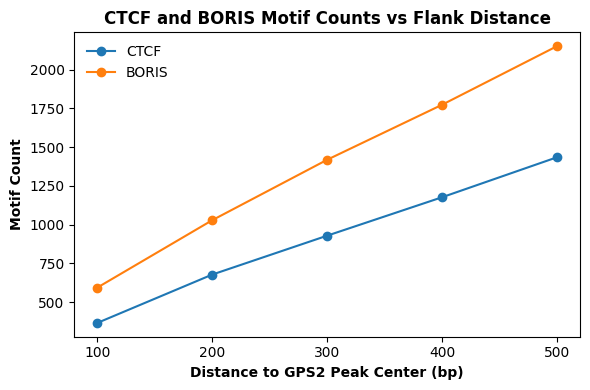

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data
df = pd.DataFrame({
    'distance': [100, 200, 300, 400, 500],
    'CTCF':    [366, 678, 929, 1177, 1435],
    'BORIS':   [594, 1029, 1419, 1774, 2152]
})

# Plot the motif counts
plt.figure(figsize=(6, 4))
plt.plot(df['distance'], df['CTCF'], marker='o', label='CTCF')
plt.plot(df['distance'], df['BORIS'], marker='o', label='BORIS')
plt.xlabel("Distance to GPS2 Peak Center (bp)", fontweight='bold')
plt.ylabel("Motif Count", fontweight='bold')
plt.title("CTCF and BORIS Motif Counts vs Flank Distance", fontweight='bold')
plt.xticks([100, 200, 300, 400, 500])
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


In [7]:
# In a Jupyter Notebook cell:
# Custom Profile Plots for Three Contexts (±1 kb) with Robust Single-Row Handling

%matplotlib inline

import gzip
import numpy as np
import matplotlib.pyplot as plt
import textwrap

# Helper function

def plot_profile(matrix_file, title, samples, colors, flank=1000):
    """
    Read a computeMatrix gz file, handle single or multiple regions,
    and plot the average profile curve.
    """
    # Read all lines
    with gzip.open(matrix_file, 'rt') as f:
        raw_lines = f.readlines()

    # Filter out comment (#) and parameter (@) lines
    data_lines = []
    for line in raw_lines:
        if line.startswith('#') or line.startswith('@'):
            continue
        fields = line.strip().split('\t')
        # Skip header if first non-comment line isn't numeric
        try:
            float(fields[1])
        except (ValueError, IndexError):
            continue
        data_lines.append(line)

    # Load numeric data into array, ensure 2D
    data = np.loadtxt(data_lines, delimiter='\t', ndmin=2)
    # data shape: (n_regions, bins_per_sample * n_samples)

    # Average across regions (rows)
    mean_all = data.mean(axis=0)  # shape = (bins * n_samples,)

    # Determine bins per sample
    K = len(samples)
    total_bins = mean_all.shape[0]
    bins_per_sample = total_bins // K

    # Reshape to (n_samples, bins_per_sample)
    mean_mat = mean_all.reshape(K, bins_per_sample)

    # Generate positions from -flank to +flank
    positions = np.linspace(-flank, flank, bins_per_sample)

    # Plot
    plt.figure(figsize=(6, 4), dpi=120)
    for idx, sig in enumerate(mean_mat):
        plt.plot(positions, sig,
                 label=samples[idx],
                 color=colors[idx],
                 linewidth=1.5)

    # Wrap title to prevent truncation
    wrapped = "\n".join(textwrap.wrap(title, width=40))
    plt.title(wrapped, fontsize=12, fontweight='bold')
    plt.xlabel("Position relative to peak center (bp)", fontsize=10)
    plt.ylabel("Average CTCF signal", fontsize=10)
    plt.legend(loc="upper right", frameon=False, fontsize=9)
    plt.tight_layout()
    plt.show()

# Sample labels and colors (match computeMatrix -S order)
samples = ["CTCF_t1", "CTCF_t2", "CTCF_t3", "CTCF_t4"]
colors  = ["red", "blue", "green", "orange"]

# Absolute paths and titles for three contexts
configs = [
    (
        "/projectnb/perissilab/Xinyu/GPS2_CHIPseq/CTCF_3T3L1/results/matrix/"
        "CTCF_signal_over_CommonGeneFiltered_GPS2_peaks_zoom1kb.gz",
        "CTCF Signal around GPS2–CTCF Common Sites (±1 kb)"
    ),
    (
        "/projectnb/perissilab/Xinyu/GPS2_CHIPseq/CTCF_3T3L1/results/matrix/"
        "CTCF_signal_over_CommonGeneFiltered_GPS2_promoter_only_peaks_zoom1kb.gz",
        "CTCF Signal over GPS2 Promoter Peaks (±1 kb)"
    ),
    (
        "/projectnb/perissilab/Xinyu/GPS2_CHIPseq/CTCF_3T3L1/results/matrix/"
        "CTCF_signal_over_CommonGeneFiltered_GPS2_non_promoter_peaks_zoom1kb.gz",
        "CTCF Signal over GPS2 Non-Promoter Peaks (±1 kb)"
    )
]

# Loop through configs and plot each profile
for matrix_path, title in configs:
    print(f"Plotting: {matrix_path.split('/')[-1]}")
    plot_profile(
        matrix_file=matrix_path,
        title=title,
        samples=samples,
        colors=colors,
        flank=1000
    )


Plotting: CTCF_signal_over_CommonGeneFiltered_GPS2_peaks_zoom1kb.gz


ValueError: could not convert string 'chr1' to float64 at row 0, column 1.